In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

Original feature columns (before FS):
['orderQuantity', 'areaName', 'OrderDinner', 'OrderLunch', 'dessertQuantity', 'discountQuantity', 'drinkQuantity', 'plateQuantity', 'noplateQuantity', 'totalValue', 'totalValueAVG', 'discountTotal', 'discountTotalAVG', 'email_ok', 'language', 'sms_ok', 'plan', 'promocode', 'reviews', 'DaysLastOrder', 'Gender_binary']
Number of original features: 21

Numeric features used for correlation analysis:
['orderQuantity', 'dessertQuantity', 'discountQuantity', 'drinkQuantity', 'plateQuantity', 'noplateQuantity', 'totalValue', 'totalValueAVG', 'discountTotal', 'discountTotalAVG', 'reviews', 'DaysLastOrder', 'Gender_binary']


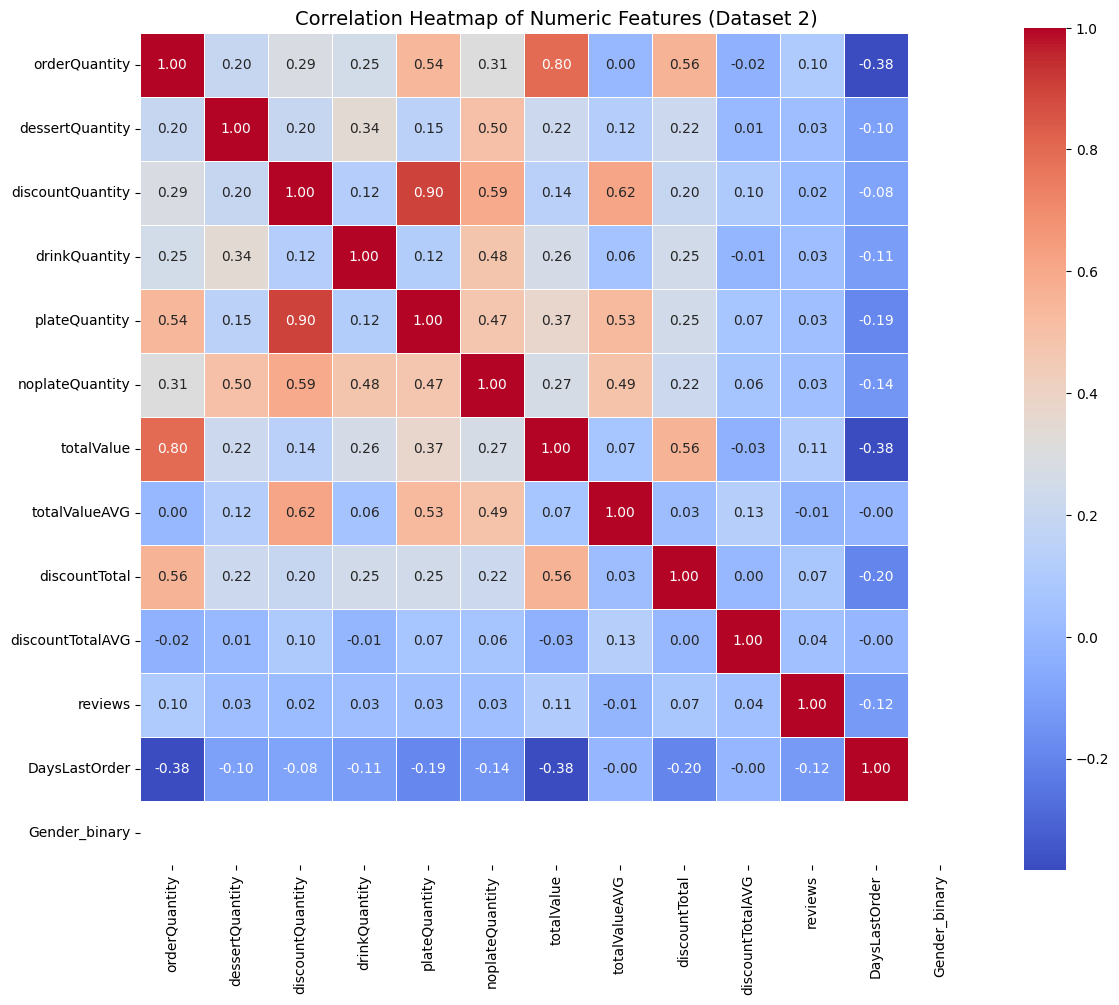


Features to drop due to high correlation (>|0.90|):
['plateQuantity']

Numeric features after correlation-based selection:
['orderQuantity', 'dessertQuantity', 'discountQuantity', 'drinkQuantity', 'noplateQuantity', 'totalValue', 'totalValueAVG', 'discountTotal', 'discountTotalAVG', 'reviews', 'DaysLastOrder', 'Gender_binary']
Number of numeric features after filter: 12

Categorical columns before encoding: ['areaName', 'OrderDinner', 'OrderLunch', 'email_ok', 'language', 'sms_ok', 'plan', 'promocode']

Final feature set BEFORE one-hot encoding (after correlation filter):
['orderQuantity', 'dessertQuantity', 'discountQuantity', 'drinkQuantity', 'noplateQuantity', 'totalValue', 'totalValueAVG', 'discountTotal', 'discountTotalAVG', 'reviews', 'DaysLastOrder', 'Gender_binary', 'areaName', 'OrderDinner', 'OrderLunch', 'email_ok', 'language', 'sms_ok', 'plan', 'promocode']
Total features (numeric + categorical): 20

Shape AFTER selective one-hot encoding (areaName, language): (7249, 22)
Fi

In [3]:


# -----------------------------------
# 1. Load and basic preprocessing
# -----------------------------------

df2 = pd.read_csv("fooddelivery.csv")
df2.columns = [c.strip() for c in df2.columns]

# Rename consistent columns
rename_map_2 = {
    'customerId': 'customerId',
    'orderQuantity': 'orderQuantity',
    'areaName': 'areaName',
    'OrderDinner': 'OrderDinner',
    'OrderLunch': 'OrderLunch',
    'gender': 'Gender',
    'reviews': 'reviews',
    'FirstOrder': 'FirstOrder',
    'DaysLastOrder': 'DaysLastOrder',
    'churn': 'Churn'
}
df2 = df2.rename(columns=rename_map_2)

# Handle missing values
if 'reviews' in df2.columns:
    df2['reviews'] = df2['reviews'].fillna(0)

# Gender: fill + binary encode (male=1, others=0)
if 'Gender' in df2.columns:
    df2['Gender'] = df2['Gender'].fillna("Unknown").astype(str)
    df2['Gender_binary'] = df2['Gender'].str.lower().map(lambda x: 1 if x == 'male' else 0)
    # drop original Gender if you don't need it anymore
    df2 = df2.drop(columns=['Gender'])

# Drop non-predictive columns (ID, raw date)
drop_cols = []
for c in ['customerId', 'FirstOrder']:
    if c in df2.columns:
        drop_cols.append(c)
df2 = df2.drop(columns=drop_cols)

# Separate target
y2 = df2['Churn']
X2 = df2.drop(columns=['Churn'])

print("Original feature columns (before FS):")
print(list(X2.columns))
print("Number of original features:", X2.shape[1])


# -----------------------------------
# 2. Select only numeric features for correlation
# -----------------------------------
num_cols = X2.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric features used for correlation analysis:")
print(num_cols)

X2_num = X2[num_cols]


# -----------------------------------
# 3. Correlation matrix + heatmap (WITH NUMBERS)
# -----------------------------------

corr = X2_num.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5,
    linecolor="white"
)
plt.title("Correlation Heatmap of Numeric Features (Dataset 2)", fontsize=14)
plt.tight_layout()
plt.show()


# -----------------------------------
# 4. Drop highly correlated features (|r| > 0.90)
# -----------------------------------
threshold = 0.90

corr_abs = corr.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print("\nFeatures to drop due to high correlation (>|{:.2f}|):".format(threshold))
print(to_drop)

X2_num_reduced = X2_num.drop(columns=to_drop)
print("\nNumeric features after correlation-based selection:")
print(list(X2_num_reduced.columns))
print("Number of numeric features after filter:", X2_num_reduced.shape[1])


# -----------------------------------
# 5. Reconstruct X2 with:
#    - reduced numeric features
#    - original remaining categorical features
# -----------------------------------
cat_cols = X2.select_dtypes(include=['object', 'bool']).columns.tolist()
print("\nCategorical columns before encoding:", cat_cols)

X2_reduced = pd.concat(
    [X2_num_reduced, X2[cat_cols]],
    axis=1
)

print("\nFinal feature set BEFORE one-hot encoding (after correlation filter):")
print(list(X2_reduced.columns))
print("Total features (numeric + categorical):", X2_reduced.shape[1])


# -----------------------------------
# 6. One-hot encode ONLY areaName and language
# -----------------------------------
cols_to_ohe = [c for c in ['areaName', 'language'] if c in X2_reduced.columns]

X2_reduced_enc = pd.get_dummies(
    X2_reduced,
    columns=cols_to_ohe,
    drop_first=False
)

print("\nShape AFTER selective one-hot encoding (areaName, language):", X2_reduced_enc.shape)
print("Final columns:")
print(list(X2_reduced_enc.columns))


In [ ]:


# -----------------------------
# 1. Load raw dataset
# -----------------------------
path_dataset1 = "Churn_Clientes.csv"
df1_raw = pd.read_csv(path_dataset1, sep=';', encoding='latin-1')

# -----------------------------
# 2. Rename columns (Dataset 1)
# -----------------------------
rename_map_1 = {
    'ClienteId': 'Client_ID',
    'ClientId': 'Client_ID',
    'DataUltimaTransacao': 'Last_Transaction_Date',
    'DataExtracao': 'Extraction_Date',
    'Score_Credito': 'Credit_Score',
    'Estado': 'State',
    'GÃªnero': 'Gender',
    'Idade': 'Age',
    'Tempo_Cliente': 'Customer_Tenure_Months',
    'Limite_Credito_Mercado': 'Market_Credit_Limit',
    'limite_credito_mercado': 'Market_Credit_Limit',
    'Qte_Categorias': 'Product_Categories_Count',
    'Usa_Cartao_Credito': 'Uses_Credit_Card',
    'Programa_Fidelidade': 'Loyalty_Program',
    'Sum_Pedidos_Acumulados': 'Total_Spent',
    'sum_pedidos_acumulado': 'Total_Spent',
    'Churn': 'Churn',
    'churn': 'Churn'
}

df1 = df1_raw.rename(columns=rename_map_1)

print("Original Dataset 1 columns:", df1.columns.tolist())

# -----------------------------
# 3. Gender handling
# -----------------------------
if "Gender" in df1.columns:
    df1["Gender"] = df1["Gender"].astype(str).str.lower().fillna("unknown")
    df1["Gender_binary"] = df1["Gender"].apply(lambda x: 1 if x == "male" else 0)
    df1 = df1.drop(columns=["Gender"])

# -----------------------------
# 4. One-hot encode State
# -----------------------------
if "State" in df1.columns:
    df1 = pd.get_dummies(df1, columns=["State"], drop_first=False)

# -----------------------------
# 5. Drop non-predictive columns
# -----------------------------
drop_cols_1 = []
for col in ["Client_ID"]:
    if col in df1.columns:
        drop_cols_1.append(col)

df1 = df1.drop(columns=drop_cols_1, errors="ignore")

# -----------------------------
# 6. CLEAN numeric columns
# -----------------------------
def clean_number(col):
    col = col.astype(str)
    # For numbers like "1,596.61": remove comma (thousands separator)
    col = col.str.replace(",", "", regex=False)
    # dot remains decimal separator
    return pd.to_numeric(col, errors="coerce")

cols_to_clean = ["Credit_Score", "Market_Credit_Limit", "Total_Spent"]
for col in cols_to_clean:
    if col in df1.columns:
        df1[col] = clean_number(df1[col])

print("\nDtypes after cleaning:")
print(df1[cols_to_clean].dtypes)

# -----------------------------
# 7. Target + Features
# -----------------------------
y1 = df1["Churn"] if "Churn" in df1.columns else None
X1 = df1.drop(columns=["Churn"], errors="ignore")

# -----------------------------
# 8. StandardScaler on numeric columns (these three)
# -----------------------------
scale_cols_1 = ["Credit_Score", "Market_Credit_Limit", "Total_Spent"]
scale_cols_1 = [col for col in scale_cols_1 if col in X1.columns]

scaler_1 = StandardScaler()
X1[scale_cols_1] = scaler_1.fit_transform(X1[scale_cols_1])

print("\n===== DATASET 1 (After first block) HEAD =====")
print(df1.head())
print("\nDataset 1 shape:", df1.shape)
print("Final columns:", df1.columns.tolist())
print("\nScaled columns preview (X1):")
print(X1[scale_cols_1].head())


Original Dataset 1 columns: ['Client_ID', 'Extraction_Date', 'Credit_Score', 'State', 'Gender', 'Age', 'Customer_Tenure_Months', 'Market_Credit_Limit', 'Product_Categories_Count', 'Uses_Credit_Card', 'Loyalty_Program', 'Total_Spent', 'Last_Transaction_Date', 'Churn']

Dtypes after cleaning:
Credit_Score             int64
Market_Credit_Limit    float64
Total_Spent            float64
dtype: object

===== DATASET 1 (After first block) HEAD =====
  Extraction_Date  Credit_Score  Age  Customer_Tenure_Months  \
0      30/06/2019           619   42                       2   
1      30/06/2019           608   41                       1   
2      30/06/2019           502   42                       8   
3      30/06/2019           699   39                       1   
4      30/06/2019           850   43                       2   

   Market_Credit_Limit  Product_Categories_Count  Uses_Credit_Card  \
0                 0.00                         1                 1   
1               838.08      

In [8]:


# ============================================================
# 0. Finalize feature matrices & CLEAN non-numeric stuff
# ============================================================

# ---- Dataset 1: drop date columns + any leftover non-numeric ----
print("Columns in X1 BEFORE cleanup:", X1.columns.tolist())

# 0a) drop raw date / extraction columns if present
date_cols_1 = [c for c in ["Extraction_Date", "Last_Transaction_Date"] if c in X1.columns]
print("Dropping date columns from X1:", date_cols_1)
X1 = X1.drop(columns=date_cols_1, errors="ignore")

# 0b) drop any remaining non-numeric columns (should be none, but just in case)
non_numeric_1 = X1.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns remaining in X1:", non_numeric_1)

if len(non_numeric_1) > 0:
    X1 = X1.drop(columns=non_numeric_1, errors="ignore")

print("Columns in X1 AFTER cleanup:", X1.columns.tolist())
print("dtypes in X1:\n", X1.dtypes)


# ---- Dataset 2: we already built X2_reduced_enc with get_dummies ----
X2 = X2_reduced_enc.copy()   # clean name

# EXTRA SAFETY: drop DaysLastOrder if it somehow survived (leakage)
if "DaysLastOrder" in X2.columns:
    print("Dropping DaysLastOrder from X2 to avoid leakage.")
    X2 = X2.drop(columns=["DaysLastOrder"])

# Just a sanity check that everything is numeric/bool
non_numeric_2 = X2.select_dtypes(exclude=[np.number, bool]).columns.tolist()
print("Non-numeric columns in X2 (should be empty):", non_numeric_2)


# ============================================================
# 1. Train/Val/Test split function (70–15–15, stratified)
# ============================================================
from sklearn.model_selection import train_test_split

def stratified_train_val_test_split(X, y, test_size=0.15, val_size=0.15, random_state=42):
    """
    Splits X, y into train, val, test with stratification on y.
    test_size and val_size are fractions of the FULL dataset.
    """
    # First split off test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y,
        test_size=test_size,
        stratify=y,
        random_state=random_state
    )
    # Now split temp into train + val
    val_rel_size = val_size / (1.0 - test_size)  # relative size inside temp
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp,
        test_size=val_rel_size,
        stratify=y_temp,
        random_state=random_state
    )
    return X_train, X_val, X_test, y_train, y_val, y_test


# ---- Apply to both datasets ----
X1_train, X1_val, X1_test, y1_train, y1_val, y1_test = stratified_train_val_test_split(X1, y1)
X2_train, X2_val, X2_test, y2_train, y2_val, y2_test = stratified_train_val_test_split(X2, y2)

print("\nDataset 1 shapes:")
print("  Train:", X1_train.shape, " Val:", X1_val.shape, " Test:", X1_test.shape)
print("Dataset 2 shapes:")
print("  Train:", X2_train.shape, " Val:", X2_val.shape, " Test:", X2_test.shape)


# ============================================================
# 2. Define baseline models (SVM, RF, XGBoost)
#    - SVM in a pipeline with StandardScaler
# ============================================================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(
            kernel="rbf",
            probability=True,
            class_weight="balanced",
            random_state=42
        ))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        tree_method="hist",
        random_state=42
    )
}


# ============================================================
# 3. Evaluation helper (Accuracy & F1 = primary; AUC-PR, Precision, Recall = secondary)
# ============================================================
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    average_precision_score  # AUC-PR
)

def train_eval_models(models, X_train, y_train, X_val, y_val, X_test, y_test, dataset_name="Dataset"):
    results = []

    for name, model in models.items():
        print(f"\n=== {dataset_name} | Training {name} ===")
        model.fit(X_train, y_train)

        # ---- Validation set ----
        val_proba = model.predict_proba(X_val)[:, 1]
        val_pred  = (val_proba >= 0.5).astype(int)

        val_acc   = accuracy_score(y_val, val_pred)
        val_f1    = f1_score(y_val, val_pred)
        val_prec  = precision_score(y_val, val_pred)
        val_rec   = recall_score(y_val, val_pred)
        val_aucpr = average_precision_score(y_val, val_proba)  # AUC-PR

        # ---- Test set ----
        test_proba = model.predict_proba(X_test)[:, 1]
        test_pred  = (test_proba >= 0.5).astype(int)

        test_acc   = accuracy_score(y_test, test_pred)
        test_f1    = f1_score(y_test, test_pred)
        test_prec  = precision_score(y_test, test_pred)
        test_rec   = recall_score(y_test, test_pred)
        test_aucpr = average_precision_score(y_test, test_proba)

        print(f"{name} - Val F1: {val_f1:.3f}, Val Accuracy: {val_acc:.3f}, Val AUC-PR: {val_aucpr:.3f}")
        print(f"{name} - Test F1: {test_f1:.3f}, Test Accuracy: {test_acc:.3f}, Test AUC-PR: {test_aucpr:.3f}")

        results.append({
            "Dataset": dataset_name,
            "Model": name,

            # Primary metrics
            "Val_Accuracy":  val_acc,
            "Val_F1":        val_f1,
            "Test_Accuracy": test_acc,
            "Test_F1":       test_f1,

            # Secondary metrics
            "Val_Precision": val_prec,
            "Val_Recall":    val_rec,
            "Val_AUC_PR":    val_aucpr,
            "Test_Precision": test_prec,
            "Test_Recall":    test_rec,
            "Test_AUC_PR":    test_aucpr,
        })

    return pd.DataFrame(results)


# ============================================================
# 4. Run baselines on both datasets
# ============================================================
results_ds1 = train_eval_models(
    models,
    X1_train, y1_train,
    X1_val,   y1_val,
    X1_test,  y1_test,
    dataset_name="Dataset 1"
)

results_ds2 = train_eval_models(
    models,
    X2_train, y2_train,
    X2_val,   y2_val,
    X2_test,  y2_test,
    dataset_name="Dataset 2"
)

print("\n=== Summary: Dataset 1 ===")
display(results_ds1)

print("\n=== Summary: Dataset 2 ===")
display(results_ds2)


Columns in X1 BEFORE cleanup: ['Credit_Score', 'Age', 'Customer_Tenure_Months', 'Market_Credit_Limit', 'Product_Categories_Count', 'Uses_Credit_Card', 'Loyalty_Program', 'Total_Spent', 'Gender_binary']
Dropping date columns from X1: []
Non-numeric columns remaining in X1: []
Columns in X1 AFTER cleanup: ['Credit_Score', 'Age', 'Customer_Tenure_Months', 'Market_Credit_Limit', 'Product_Categories_Count', 'Uses_Credit_Card', 'Loyalty_Program', 'Total_Spent', 'Gender_binary']
dtypes in X1:
 Credit_Score                float64
Age                           int64
Customer_Tenure_Months        int64
Market_Credit_Limit         float64
Product_Categories_Count      int64
Uses_Credit_Card              int64
Loyalty_Program               int64
Total_Spent                 float64
Gender_binary                 int64
dtype: object
Dropping DaysLastOrder from X2 to avoid leakage.
Non-numeric columns in X2 (should be empty): []

Dataset 1 shapes:
  Train: (7000, 9)  Val: (1500, 9)  Test: (1500, 9)
Da

,Dataset,Model,Val_Accuracy,Val_F1,Test_Accuracy,Test_F1,Val_Precision,Val_Recall,Val_AUC_PR,Test_Precision,Test_Recall,Test_AUC_PR
0,Dataset 1,SVM,0.840000,0.555556,0.836667,0.526112,0.630252,0.496689,0.603566,0.632558,0.450331,0.610684
1,Dataset 1,RandomForest,0.849333,0.542510,0.850667,0.539095,0.697917,0.443709,0.612957,0.711957,0.433775,0.618070
2,Dataset 1,XGBoost,0.838667,0.517928,0.851333,0.561886,0.650000,0.430464,0.615658,0.690821,0.473510,0.636548



=== Summary: Dataset 2 ===


,Dataset,Model,Val_Accuracy,Val_F1,Test_Accuracy,Test_F1,Val_Precision,Val_Recall,Val_AUC_PR,Test_Precision,Test_Recall,Test_AUC_PR
0,Dataset 2,SVM,0.734375,0.750216,0.712316,0.732707,0.707993,0.797794,0.735405,0.683121,0.790055,0.723122
1,Dataset 2,RandomForest,0.704044,0.708861,0.697610,0.705461,0.697509,0.720588,0.713906,0.686411,0.725599,0.718994
2,Dataset 2,XGBoost,0.714154,0.724046,0.715993,0.724353,0.699828,0.750000,0.754982,0.702422,0.747698,0.721354


In [9]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# ============================
# Dataset 1 – SMOTE + Tomek on TRAIN only
# ============================
tomek_1 = TomekLinks(
    sampling_strategy="auto",
    n_jobs=-1
)

smote_1 = SMOTE(
    sampling_strategy="auto",   # minority ~50% of majority
    random_state=42
)

smote_tomek_1 = SMOTETomek(
    sampling_strategy="auto",
    random_state=42,
    smote=smote_1,
    tomek=tomek_1,
    n_jobs=-1
)

print("\nIniciando SMOTE + Tomek Link Undersampling (Dataset 1)...")
X1_train_smote_tomek, y1_train_smote_tomek = smote_tomek_1.fit_resample(X1_train, y1_train)
print("Concluída preparação SMOTE + Tomek Link Undersampling!")
print("Shape y1_train:             ", y1_train.shape)
print("Shape y1_train_smote_tomek: ", y1_train_smote_tomek.shape)

# ============================
# Build final DataFrames for testing / PyTorch Tabular
# ============================

# Ensure Series have proper name
y1_train_smote_tomek = pd.Series(y1_train_smote_tomek, name="Churn")
y1_val = pd.Series(y1_val, name="Churn")
y1_test = pd.Series(y1_test, name="Churn")

# Convert X back to DataFrame if needed
if not isinstance(X1_train_smote_tomek, pd.DataFrame):
    X1_train_smote_tomek = pd.DataFrame(X1_train_smote_tomek, columns=X1_train.columns)

if not isinstance(X1_val, pd.DataFrame):
    X1_val = pd.DataFrame(X1_val, columns=X1_train.columns)

if not isinstance(X1_test, pd.DataFrame):
    X1_test = pd.DataFrame(X1_test, columns=X1_train.columns)

# Final train / val / test DataFrames
train_df1_smote_tomek = X1_train_smote_tomek.copy()
train_df1_smote_tomek["Churn"] = y1_train_smote_tomek.values

val_df1_final = X1_val.copy()
val_df1_final["Churn"] = y1_val.values

test_df1_final = X1_test.copy()
test_df1_final["Churn"] = y1_test.values

print("\nDataset 1 – final shapes for testing:")
print("  Train (SMOTE+Tomek):", train_df1_smote_tomek.shape)
print("  Val:                ", val_df1_final.shape)
print("  Test:               ", test_df1_final.shape)

print("\nClass balance – train (SMOTE+Tomek):")
print(train_df1_smote_tomek["Churn"].value_counts(normalize=True))



Iniciando SMOTE + Tomek Link Undersampling (Dataset 1)...
Concluída preparação SMOTE + Tomek Link Undersampling!
Shape y1_train:              (7000,)
Shape y1_train_smote_tomek:  (11123,)

Dataset 1 – final shapes for testing:
  Train (SMOTE+Tomek): (11123, 10)
  Val:                 (1500, 10)
  Test:                (1500, 10)

Class balance – train (SMOTE+Tomek):
Churn
0    0.502652
1    0.497348
Name: proportion, dtype: float64


In [10]:
# ============================================================
# 5. Evaluate ML models on Dataset 1 with SMOTE+Tomek
# ============================================================

results_ds1_smote_tomek = train_eval_models(
    models,
    X1_train_smote_tomek, y1_train_smote_tomek,  # <-- resampled train
    X1_val,               y1_val,                # <-- original val
    X1_test,              y1_test,               # <-- original test
    dataset_name="Dataset 1 (SMOTE+Tomek)"
)

print("\n=== Summary: Dataset 1 (SMOTE+Tomek) ===")
display(results_ds1_smote_tomek)



=== Dataset 1 (SMOTE+Tomek) | Training SVM ===
SVM - Val F1: 0.542, Val Accuracy: 0.762, Val AUC-PR: 0.568
SVM - Test F1: 0.523, Test Accuracy: 0.753, Test AUC-PR: 0.569

=== Dataset 1 (SMOTE+Tomek) | Training RandomForest ===
RandomForest - Val F1: 0.563, Val Accuracy: 0.812, Val AUC-PR: 0.578
RandomForest - Test F1: 0.550, Test Accuracy: 0.805, Test AUC-PR: 0.567

=== Dataset 1 (SMOTE+Tomek) | Training XGBoost ===
XGBoost - Val F1: 0.536, Val Accuracy: 0.771, Val AUC-PR: 0.601
XGBoost - Test F1: 0.516, Test Accuracy: 0.767, Test AUC-PR: 0.611

=== Summary: Dataset 1 (SMOTE+Tomek) ===


,Dataset,Model,Val_Accuracy,Val_F1,Test_Accuracy,Test_F1,Val_Precision,Val_Recall,Val_AUC_PR,Test_Precision,Test_Recall,Test_AUC_PR
0,Dataset 1 (SMOTE+Tomek),SVM,0.762000,0.541720,0.752667,0.522523,0.442348,0.698675,0.568302,0.427368,0.672185,0.568724
1,Dataset 1 (SMOTE+Tomek),RandomForest,0.812000,0.563467,0.804667,0.549923,0.529070,0.602649,0.578335,0.512894,0.592715,0.567382
2,Dataset 1 (SMOTE+Tomek),XGBoost,0.771333,0.535859,0.767333,0.515950,0.453089,0.655629,0.600768,0.443914,0.615894,0.610619


In [11]:
import optuna
from sklearn.metrics import roc_auc_score  # AUC-ROC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np


def objective_svm(trial, X_train, y_train, X_val, y_val):
    C = trial.suggest_float("C", 1e-3, 1e2, log=True)
    gamma = trial.suggest_float("gamma", 1e-4, 1e0, log=True)
    kernel = trial.suggest_categorical("kernel", ["rbf", "linear"])

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(
            C=C,
            gamma=gamma,
            kernel=kernel,
            probability=True,           # needed for predict_proba
            class_weight="balanced",
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)
    val_proba = model.predict_proba(X_val)[:, 1]  # prob of class 1

    return roc_auc_score(y_val, val_proba)


def objective_rf(trial, X_train, y_train, X_val, y_val):
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 3, 25)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )

    model.fit(X_train, y_train)
    val_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, val_proba)


def objective_xgb(trial, X_train, y_train, X_val, y_val):
    max_depth = trial.suggest_int("max_depth", 3, 10)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 3e-1, log=True)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    n_estimators = trial.suggest_int("n_estimators", 100, 500)

    model = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=n_estimators,
        eval_metric="logloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)
    val_proba = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y_val, val_proba)


In [12]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    average_precision_score,  # AUC-PR
    roc_auc_score,            # AUC-ROC
)

def tune_and_evaluate_model(
    model_name,
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    n_trials=30,
    dataset_label="Dataset"
):
    print(f"\n==============================")
    print(f"{dataset_label} | Optuna tuning for {model_name}")
    print(f"==============================")

    # Ensure numpy arrays
    X_train_np = X_train.values if hasattr(X_train, "values") else X_train
    X_val_np   = X_val.values   if hasattr(X_val, "values") else X_val
    X_test_np  = X_test.values  if hasattr(X_test, "values") else X_test
    y_train_np = y_train.values if hasattr(y_train, "values") else y_train
    y_val_np   = y_val.values   if hasattr(y_val, "values") else y_val
    y_test_np  = y_test.values  if hasattr(y_test, "values") else y_test

    # Pick the objective (now returning AUC-ROC)
    if model_name == "SVM":
        objective = lambda trial: objective_svm(trial, X_train_np, y_train_np, X_val_np, y_val_np)
    elif model_name == "RandomForest":
        objective = lambda trial: objective_rf(trial, X_train_np, y_train_np, X_val_np, y_val_np)
    elif model_name == "XGBoost":
        objective = lambda trial: objective_xgb(trial, X_train_np, y_train_np, X_val_np, y_val_np)
    else:
        raise ValueError("Unsupported model_name")

    # Create & run Optuna study (max AUC-ROC)
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

    print(f"\nBest validation AUC-ROC: {study.best_value:.4f}")
    print("Best hyperparameters:")
    for k, v in study.best_params.items():
        print(f"  {k}: {v}")

    # Refit on train + val
    X_train_full = np.vstack([X_train_np, X_val_np])
    y_train_full = np.concatenate([y_train_np, y_val_np])

    # Build best model
    if model_name == "SVM":
        best_model = Pipeline([
            ("scaler", StandardScaler()),
            ("svc", SVC(
                C=study.best_params["C"],
                gamma=study.best_params["gamma"],
                kernel=study.best_params["kernel"],
                probability=True,
                class_weight="balanced",
                random_state=42
            ))
        ])

    elif model_name == "RandomForest":
        best_model = RandomForestClassifier(
            n_estimators=study.best_params["n_estimators"],
            max_depth=study.best_params["max_depth"],
            min_samples_split=study.best_params["min_samples_split"],
            max_features=study.best_params["max_features"],
            class_weight="balanced",
            n_jobs=-1,
            random_state=42
        )

    elif model_name == "XGBoost":
        best_model = XGBClassifier(
            max_depth=study.best_params["max_depth"],
            learning_rate=study.best_params["learning_rate"],
            min_child_weight=study.best_params["min_child_weight"],
            subsample=study.best_params["subsample"],
            colsample_bytree=study.best_params["colsample_bytree"],
            n_estimators=study.best_params["n_estimators"],
            eval_metric="logloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1
        )

    # Fit on combined training data
    best_model.fit(X_train_full, y_train_full)

    # TEST evaluation
    proba_test = best_model.predict_proba(X_test_np)[:, 1]
    pred_test  = best_model.predict(X_test_np)

    # Primary metrics (you can treat AUC-ROC as primary too)
    test_acc    = accuracy_score(y_test_np, pred_test)
    test_f1     = f1_score(y_test_np, pred_test)
    test_aucroc = roc_auc_score(y_test_np, proba_test)

    # Secondary metrics
    test_prec  = precision_score(y_test_np, pred_test)
    test_rec   = recall_score(y_test_np, pred_test)
    test_aucpr = average_precision_score(y_test_np, proba_test)

    print(f"\n{dataset_label} | {model_name} (Optuna-tuned) – TEST performance:")
    print(f"  Accuracy:  {test_acc:.3f}")
    print(f"  F1-score:  {test_f1:.3f}")
    print(f"  Precision: {test_prec:.3f}")
    print(f"  Recall:    {test_rec:.3f}")
    print(f"  AUC-ROC:   {test_aucroc:.3f}")
    print(f"  AUC-PR:    {test_aucpr:.3f}")

    return best_model, study, {
        "Dataset":        dataset_label,
        "Model":          model_name,
        "Test_Accuracy":  test_acc,
        "Test_F1":        test_f1,
        "Test_Precision": test_prec,
        "Test_Recall":    test_rec,
        "Test_AUC_ROC":   test_aucroc,
        "Test_AUC_PR":    test_aucpr,
    }


In [13]:
#RF dataset1

rf_ds1, rf_study_ds1, rf_res_ds1 = tune_and_evaluate_model(
    "RandomForest",
    X1_train_smote_tomek, y1_train_smote_tomek,  # <-- resampled train
    X1_val,               y1_val,                # <-- original val
    X1_test,              y1_test,
    n_trials=10,              
    dataset_label="Dataset 1 (SMOTE+Tomek)"
)

[I 2025-11-29 16:00:17,895] A new study created in memory with name: no-name-425b65b4-b401-4622-8c6a-b87fd4b938b6



Dataset 1 (SMOTE+Tomek) | Optuna tuning for RandomForest


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-29 16:00:19,628] Trial 0 finished with value: 0.8265597187365257 and parameters: {'n_estimators': 482, 'max_depth': 5, 'min_samples_split': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8265597187365257.
[I 2025-11-29 16:00:20,534] Trial 1 finished with value: 0.8291744519010713 and parameters: {'n_estimators': 237, 'max_depth': 9, 'min_samples_split': 4, 'max_features': 'log2'}. Best is trial 1 with value: 0.8291744519010713.
[I 2025-11-29 16:00:21,164] Trial 2 finished with value: 0.8291578679697951 and parameters: {'n_estimators': 182, 'max_depth': 7, 'min_samples_split': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8291744519010713.
[I 2025-11-29 16:00:22,707] Trial 3 finished with value: 0.8295586463089697 and parameters: {'n_estimators': 306, 'max_depth': 5, 'min_samples_split': 5, 'max_features': None}. Best is trial 3 with value: 0.8295586463089697.
[I 2025-11-29 16:00:24,431] Trial 4 finished with value: 0.8173127950557773 and parameters: {'

In [52]:
# SVM dataset1
svm_ds1, svm_study_ds1, svm_res_ds1 = tune_and_evaluate_model(
    "SVM",
    X1_train_smote_tomek, y1_train_smote_tomek,  # <-- resampled train
    X1_val,               y1_val,                # <-- original val
    X1_test,              y1_test,
    n_trials=10,              
    dataset_label="Dataset 1 (SMOTE+Tomek)"
)

[I 2025-11-29 18:02:13,935] A new study created in memory with name: no-name-2cd20731-39b4-4476-8fc4-a63558413d30



Dataset 1 (SMOTE+Tomek) | Optuna tuning for SVM


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-29 18:02:43,043] Trial 0 finished with value: 0.7087405609791153 and parameters: {'C': 0.5394173202421129, 'gamma': 0.0005049212246575371, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7087405609791153.
[I 2025-11-29 18:03:04,549] Trial 1 finished with value: 0.7917389910336211 and parameters: {'C': 0.12114700991529392, 'gamma': 0.052381269223545135, 'kernel': 'rbf'}. Best is trial 1 with value: 0.7917389910336211.
[I 2025-11-29 18:03:24,337] Trial 2 finished with value: 0.7154819290428861 and parameters: {'C': 0.02653752067763306, 'gamma': 0.001318824483828008, 'kernel': 'linear'}. Best is trial 1 with value: 0.7917389910336211.
[I 2025-11-29 18:03:50,187] Trial 3 finished with value: 0.7154916030027972 and parameters: {'C': 0.9290334556191243, 'gamma': 0.22670585745700925, 'kernel': 'linear'}. Best is trial 1 with value: 0.7917389910336211.
[I 2025-11-29 18:05:52,587] Trial 4 finished with value: 0.7154916030027971 and parameters: {'C': 22.46388361184836, 'gamma': 0.0001

In [19]:
#XGB Dataset1

xg_ds1, xg_study_ds1, xg_res_ds1 = tune_and_evaluate_model(
    "XGBoost",
    X1_train_smote_tomek, y1_train_smote_tomek,  # <-- resampled train
    X1_val,               y1_val,                # <-- original val
    X1_test,              y1_test,
    n_trials=25,              
    dataset_label="Dataset 1 (SMOTE+Tomek)"
)

[I 2025-11-29 16:08:12,877] A new study created in memory with name: no-name-95102ab1-a820-451f-828a-36bfa88f0af2



Dataset 1 (SMOTE+Tomek) | Optuna tuning for XGBoost


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-11-29 16:08:13,427] Trial 0 finished with value: 0.8145557164811109 and parameters: {'max_depth': 9, 'learning_rate': 0.12902182427904788, 'min_child_weight': 1, 'subsample': 0.930891306007537, 'colsample_bytree': 0.8629365403352279, 'n_estimators': 130}. Best is trial 0 with value: 0.8145557164811109.
[I 2025-11-29 16:08:13,741] Trial 1 finished with value: 0.8276432022465698 and parameters: {'max_depth': 7, 'learning_rate': 0.0067392254640574675, 'min_child_weight': 9, 'subsample': 0.6504892755420624, 'colsample_bytree': 0.5351946256628459, 'n_estimators': 178}. Best is trial 1 with value: 0.8276432022465698.
[I 2025-11-29 16:08:14,161] Trial 2 finished with value: 0.8207401408528563 and parameters: {'max_depth': 3, 'learning_rate': 0.0015806599744219532, 'min_child_weight': 3, 'subsample': 0.5092178157365305, 'colsample_bytree': 0.7036005479577854, 'n_estimators': 287}. Best is trial 1 with value: 0.8276432022465698.
[I 2025-11-29 16:08:14,707] Trial 3 finished with value: 0

In [16]:
# Dataset 2
xgb_ds2, xgb_study_ds2, xgb_res_ds2 = tune_and_evaluate_model(
    "XGBoost",
    X2_train, y2_train,
    X2_val,   y2_val,
    X2_test,  y2_test,
    n_trials=20,
    dataset_label="Dataset 2"
)

[I 2025-11-29 16:05:34,962] A new study created in memory with name: no-name-f17c7711-9429-450a-8b37-8525e52e4f82



Dataset 2 | Optuna tuning for XGBoost


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-11-29 16:05:35,304] Trial 0 finished with value: 0.7936124702638409 and parameters: {'max_depth': 4, 'learning_rate': 0.009535147691452125, 'min_child_weight': 3, 'subsample': 0.9820191028137493, 'colsample_bytree': 0.7774924039652293, 'n_estimators': 144}. Best is trial 0 with value: 0.7936124702638409.
[I 2025-11-29 16:05:35,449] Trial 1 finished with value: 0.7962363483996541 and parameters: {'max_depth': 3, 'learning_rate': 0.015782359762718166, 'min_child_weight': 9, 'subsample': 0.7277457520265126, 'colsample_bytree': 0.6716240876276689, 'n_estimators': 306}. Best is trial 1 with value: 0.7962363483996541.
[I 2025-11-29 16:05:35,851] Trial 2 finished with value: 0.7833467371323529 and parameters: {'max_depth': 6, 'learning_rate': 0.042458852518164, 'min_child_weight': 3, 'subsample': 0.8690126638214377, 'colsample_bytree': 0.9773304786711932, 'n_estimators': 411}. Best is trial 1 with value: 0.7962363483996541.
[I 2025-11-29 16:05:36,292] Trial 3 finished with value: 0.79

In [17]:
# Dataset 2
rf_ds2, rf_study_ds2, rf_res_ds2 = tune_and_evaluate_model(
    "RandomForest",
    X2_train, y2_train,
    X2_val,   y2_val,
    X2_test,  y2_test,
    n_trials=20,
    dataset_label="Dataset 2"
)

[I 2025-11-29 16:05:42,177] A new study created in memory with name: no-name-cc293b22-b352-423f-a886-c62f79387d46



Dataset 2 | Optuna tuning for RandomForest


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-11-29 16:05:43,062] Trial 0 finished with value: 0.790502000432526 and parameters: {'n_estimators': 208, 'max_depth': 6, 'min_samples_split': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.790502000432526.
[I 2025-11-29 16:05:43,748] Trial 1 finished with value: 0.7903448718641868 and parameters: {'n_estimators': 242, 'max_depth': 6, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.790502000432526.
[I 2025-11-29 16:05:44,567] Trial 2 finished with value: 0.7934198610510381 and parameters: {'n_estimators': 295, 'max_depth': 9, 'min_samples_split': 4, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.7934198610510381.
[I 2025-11-29 16:05:45,056] Trial 3 finished with value: 0.7925514300389273 and parameters: {'n_estimators': 168, 'max_depth': 13, 'min_samples_split': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.7934198610510381.
[I 2025-11-29 16:05:46,317] Trial 4 finished with value: 0.7741352860077856 and parameters: {

In [18]:
# Dataset 2
svm_ds2, svm_study_ds2, svm_res_ds2 = tune_and_evaluate_model(
    "SVM",
    X2_train, y2_train,
    X2_val,   y2_val,
    X2_test,  y2_test,
    n_trials=10,
    dataset_label="Dataset 2"
)

[I 2025-11-29 16:06:03,198] A new study created in memory with name: no-name-4951e6e1-011b-4f59-b692-ce561a2b0c4a



Dataset 2 | Optuna tuning for SVM


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-29 16:06:09,047] Trial 0 finished with value: 0.7859756839316608 and parameters: {'C': 0.5130852817398492, 'gamma': 0.05552905867583091, 'kernel': 'linear'}. Best is trial 0 with value: 0.7859756839316608.
[I 2025-11-29 16:06:13,826] Trial 1 finished with value: 0.7858945853157441 and parameters: {'C': 0.2290984372753325, 'gamma': 0.004737822790232544, 'kernel': 'linear'}. Best is trial 0 with value: 0.7859756839316608.
[I 2025-11-29 16:06:20,462] Trial 2 finished with value: 0.7858438986807958 and parameters: {'C': 0.9369320279633291, 'gamma': 0.006532851970182639, 'kernel': 'linear'}. Best is trial 0 with value: 0.7859756839316608.
[I 2025-11-29 16:06:30,396] Trial 3 finished with value: 0.3330652573529411 and parameters: {'C': 0.002773272644490378, 'gamma': 0.8033102303526645, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7859756839316608.
[I 2025-11-29 16:06:58,359] Trial 4 finished with value: 0.7860196123486158 and parameters: {'C': 18.7789258730019, 'gamma': 0.00030

In [22]:
# ==== PyTorch 2.6 + pytorch_tabular compatibility patch ====
import typing
from omegaconf import DictConfig, ListConfig
from omegaconf.base import ContainerMetadata
import torch.serialization as ts

# Allow OmegaConf + typing objects when torch.load is called internally
ts.add_safe_globals([DictConfig, ListConfig, ContainerMetadata, typing.Any])
# ==== END PATCH ====
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


import pytorch_tabular

from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models import TabNetModelConfig, FTTransformerConfig

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    average_precision_score,
)

# =========================
# DATA CONFIGS
# =========================

# ===== DATASET 1 =====
train_df1 = X1_train.copy()
train_df1["Churn"] = y1_train.values

val_df1 = X1_val.copy()
val_df1["Churn"] = y1_val.values

test_df1 = X1_test.copy()
test_df1["Churn"] = y1_test.values

cont_cols_1 = list(X1_train.columns)  # all numeric; categoricals already encoded
cat_cols_1 = []  # no raw categoricals left

data_config_1 = DataConfig(
    target=["Churn"],
    continuous_cols=cont_cols_1,
    categorical_cols=cat_cols_1,
)

# ===== DATASET 2 =====
train_df2 = X2_train.copy()
train_df2["Churn"] = y2_train.values

val_df2 = X2_val.copy()
val_df2["Churn"] = y2_val.values

test_df2 = X2_test.copy()
test_df2["Churn"] = y2_test.values

cont_cols_2 = list(X2_train.columns)
cat_cols_2 = []

data_config_2 = DataConfig(
    target=["Churn"],
    continuous_cols=cont_cols_2,
    categorical_cols=cat_cols_2,
)

# =========================
# TRAINER & OPTIMIZER CONFIG
# =========================

trainer_config = TrainerConfig(
    batch_size=256,
    max_epochs=50,
    accelerator="cpu",   # safer on Windows
    devices=1,
    progress_bar="none",  # avoid rich Live progress errors
    load_best=False,      # 🔑 don't reload from checkpoint -> no torch.load -> no UnpicklingError
    checkpoints_save_top_k=0,  # optional: don't even save checkpoints
)
optimizer_config = OptimizerConfig()  # default Adam etc.


# =========================
# MODEL CONFIGS (TABNET & FT-TRANSFORMER)
# =========================

tabnet_config = TabNetModelConfig(
    task="classification",
    learning_rate=1e-3,
)

ftt_config = FTTransformerConfig(
    task="classification",
    learning_rate=1e-3,
)



# =========================
# TRAIN + EVAL FUNCTION
# =========================
def train_eval_pttabular(
    model_config,
    data_config,
    train_df,
    val_df,
    test_df,
    dataset_label="Dataset",
    model_label="Model",
):
    tab_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )

    print(f"\n=== {dataset_label} | Training {model_label} ===")
    tab_model.fit(train=train_df, validation=val_df)

    preds = tab_model.predict(test_df)

    y_true = test_df["Churn"].values

    # === Find probability column for positive class ===
    prob_cols = [c for c in preds.columns if c.endswith("_probability")]

    positive_col = None
    for c in prob_cols:
        if ("_1_probability" in c) or ("_True_probability" in c):
            positive_col = c
            break
    if positive_col is None and len(prob_cols) == 2:
        positive_col = sorted(prob_cols)[1]
    if positive_col is None:
        raise ValueError(
            f"Could not find probability column for positive class. Got columns: {list(preds.columns)}"
        )

    proba_1 = preds[positive_col].to_numpy()

    # === Metrics ===
    y_pred    = (proba_1 >= 0.5).astype(int)
    test_acc  = accuracy_score(y_true, y_pred)
    test_f1   = f1_score(y_true, y_pred)
    test_prec = precision_score(y_true, y_pred)
    test_rec  = recall_score(y_true, y_pred)
    test_aucpr  = average_precision_score(y_true, proba_1)
    test_aucroc = roc_auc_score(y_true, proba_1)   # ⬅️ AUC-ROC

    print(f"{dataset_label} | {model_label} – TEST performance:")
    print(f"  AUC-ROC:   {test_aucroc:.3f}")   # ⬅️ print first as main
    print(f"  AUC-PR:    {test_aucpr:.3f}")
    print(f"  Accuracy:  {test_acc:.3f}")
    print(f"  F1-score:  {test_f1:.3f}")
    print(f"  Precision: {test_prec:.3f}")
    print(f"  Recall:    {test_rec:.3f}")

    return {
        "Dataset":        dataset_label,
        "Model":          model_label,
        "Test_AUC_ROC":   test_aucroc,
        "Test_AUC_PR":    test_aucpr,
        "Test_Accuracy":  test_acc,
        "Test_F1":        test_f1,
        "Test_Precision": test_prec,
        "Test_Recall":    test_rec,
    }
    # === ROC Curve ===


# =========================
# RUN MODELS
# =========================


# Dataset 1 – TabNet
results_1_tabnet = train_eval_pttabular(
    model_config=tabnet_config,
    data_config=data_config_1,
    train_df=train_df1,
    val_df=val_df1,
    test_df=test_df1,
    dataset_label="Dataset 1 (SMOTE+Tomek)",
    model_label="TabNet",
)

# Dataset 1 – FT-Transformer
results_1_ftt = train_eval_pttabular(
    model_config=ftt_config,
    data_config=data_config_1,
    train_df=train_df1,
    val_df=val_df1,
    test_df=test_df1,
    dataset_label="Dataset 1 (SMOTE+Tomek)",
    model_label="FT-Transformer",
)
# Dataset 2 – TabNet
results_2_tabnet = train_eval_pttabular(
    model_config=tabnet_config,
    data_config=data_config_2,
    train_df=train_df2,
    val_df=val_df2,
    test_df=test_df2,
    dataset_label="Dataset 2",
    model_label="TabNet",
)

# Dataset 2 – FT-Transformer
results_2_ftt = train_eval_pttabular(
    model_config=ftt_config,
    data_config=data_config_2,
    train_df=train_df2,
    val_df=val_df2,
    test_df=test_df2,
    dataset_label="Dataset 2",
    model_label="FT-Transformer",
)

results_2_tabnet, results_2_ftt


2025-11-29 16:26:43,995 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42



=== Dataset 1 (SMOTE+Tomek) | Training TabNet ===


2025-11-29 16:26:44,166 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-11-29 16:26:44,252 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.39411166  0.39411166 -1.22104442 ...  1.34420346  1.91425855
 -0.93601688]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.03399111  0.34509017 -0.34381078 ... -1.03271172  1.37844158
 -0.34381078]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_da

2025-11-29 16:26:44,416 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: TabNetModel

2025-11-29 16:26:44,708 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-29 16:26:45,120 - {pytorch_tabular.tabular_model:678} - INFO - Training Started


  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | _embedding_layer | Identity         | 0      | train
1 | _backbone        | TabNetBackbone   | 6.2 K  | train
2 | _head            | Identity         | 0      | train
3 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
6.2 K     Trainable params
0         Non-trainable params
6.2 K     Total params
0.025     Total estimated model params size (MB)
107       Modules in train mode
0         Modules in eval mode
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\torch\utils\data\dat

2025-11-29 16:27:25,985 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.65098933  3.62442381  0.39411166 ... -1.03102606  0.01407493
 -0.17594343]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.37716219  0.34509017  1.37844158 ... -0.68826125 -1.37716219
 -1.03271172]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\d

Dataset 1 (SMOTE+Tomek) | TabNet – TEST performance:
  AUC-ROC:   0.784
  AUC-PR:    0.542
  Accuracy:  0.831
  F1-score:  0.451
  Precision: 0.654
  Recall:    0.344


2025-11-29 16:27:26,226 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42



=== Dataset 1 (SMOTE+Tomek) | Training FT-Transformer ===


2025-11-29 16:27:26,311 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-11-29 16:27:26,328 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.39411166  0.39411166 -1.22104442 ...  1.34420346  1.91425855
 -0.93601688]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.03399111  0.34509017 -0.34381078 ... -1.03271172  1.37844158
 -0.34381078]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_da

2025-11-29 16:27:26,393 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-11-29 16:27:26,511 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-29 16:27:26,559 - {pytorch_tabular.tabular_model:678} - INFO - Training Started


  | Name             | Type                  | Params | Mode 
-------------------------------------------------------------------
0 | _backbone        | FTTransformerBackbone | 271 K  | train
1 | _embedding_layer | Embedding2dLayer      | 594    | train
2 | _head            | LinearHead            | 66     | train
3 | loss             | CrossEntropyLoss      | 0      | train
-------------------------------------------------------------------
272 K     Trainable params
0         Non-trainable params
272 K     Total params
1.088     Total estimated model params size (MB)
122       Modules in train mode
0         Modules in eval mode
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\dongu\anaconda3\envs\churn_env\Lib

2025-11-29 16:29:31,750 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.65098933  3.62442381  0.39411166 ... -1.03102606  0.01407493
 -0.17594343]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.37716219  0.34509017  1.37844158 ... -0.68826125 -1.37716219
 -1.03271172]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\d

Dataset 1 (SMOTE+Tomek) | FT-Transformer – TEST performance:
  AUC-ROC:   0.841
  AUC-PR:    0.635
  Accuracy:  0.855
  F1-score:  0.529
  Precision: 0.767
  Recall:    0.404


2025-11-29 16:29:32,671 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42



=== Dataset 2 | Training TabNet ===


2025-11-29 16:29:32,782 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-11-29 16:29:32,831 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.5070675  -0.32811287 -0.02985517 ...  0.5070087  -0.56671904
  0.08944792]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16118081 -0.16118081 -0.16118081 ... -0.16118081 -0.16118081
 -0.16118081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_da

2025-11-29 16:29:32,940 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: TabNetModel

2025-11-29 16:29:33,032 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-29 16:29:33,196 - {pytorch_tabular.tabular_model:678} - INFO - Training Started


  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | _embedding_layer | Identity         | 0      | train
1 | _backbone        | TabNetBackbone   | 7.0 K  | train
2 | _head            | Identity         | 0      | train
3 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
7.0 K     Trainable params
0         Non-trainable params
7.0 K     Total params
0.028     Total estimated model params size (MB)
107       Modules in train mode
0         Modules in eval mode
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\torch\utils\data\dat

2025-11-29 16:29:46,144 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38770562 -0.5070675  -0.5070675  ... -0.56671904 -0.44741596
 -0.56671904]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16118081 -0.16118081 -0.16118081 ... -0.16118081 -0.16118081
 -0.16118081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\d

Dataset 2 | TabNet – TEST performance:
  AUC-ROC:   0.617
  AUC-PR:    0.599
  Accuracy:  0.583
  F1-score:  0.659
  Precision: 0.557
  Recall:    0.807


2025-11-29 16:29:46,474 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42



=== Dataset 2 | Training FT-Transformer ===


2025-11-29 16:29:46,565 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-11-29 16:29:46,586 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.5070675  -0.32811287 -0.02985517 ...  0.5070087  -0.56671904
  0.08944792]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16118081 -0.16118081 -0.16118081 ... -0.16118081 -0.16118081
 -0.16118081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_da

2025-11-29 16:29:46,801 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-11-29 16:29:46,926 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-29 16:29:46,988 - {pytorch_tabular.tabular_model:678} - INFO - Training Started


  | Name             | Type                  | Params | Mode 
-------------------------------------------------------------------
0 | _backbone        | FTTransformerBackbone | 271 K  | train
1 | _embedding_layer | Embedding2dLayer      | 1.4 K  | train
2 | _head            | LinearHead            | 66     | train
3 | loss             | CrossEntropyLoss      | 0      | train
-------------------------------------------------------------------
272 K     Trainable params
0         Non-trainable params
272 K     Total params
1.091     Total estimated model params size (MB)
122       Modules in train mode
0         Modules in eval mode
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\dongu\anaconda3\envs\churn_env\Lib

2025-11-29 16:32:43,777 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38770562 -0.5070675  -0.5070675  ... -0.56671904 -0.44741596
 -0.56671904]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16118081 -0.16118081 -0.16118081 ... -0.16118081 -0.16118081
 -0.16118081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\d

Dataset 2 | FT-Transformer – TEST performance:
  AUC-ROC:   0.770
  AUC-PR:    0.729
  Accuracy:  0.722
  F1-score:  0.744
  Precision: 0.690
  Recall:    0.807


({'Dataset': 'Dataset 2',
  'Model': 'TabNet',
  'Test_AUC_ROC': 0.6172791322418775,
  'Test_AUC_PR': 0.5987523514055786,
  'Test_Accuracy': 0.5827205882352942,
  'Test_F1': 0.6586466165413534,
  'Test_Precision': 0.5565438373570522,
  'Test_Recall': 0.8066298342541437},
 {'Dataset': 'Dataset 2',
  'Model': 'FT-Transformer',
  'Test_AUC_ROC': 0.7695963640664335,
  'Test_AUC_PR': 0.7291539583693878,
  'Test_Accuracy': 0.7224264705882353,
  'Test_F1': 0.7436332767402377,
  'Test_Precision': 0.6897637795275591,
  'Test_Recall': 0.8066298342541437})

In [ ]:
import optuna


def get_positive_proba(preds):
    """Extract probability for the positive class from pytorch_tabular predictions."""
    prob_cols = [c for c in preds.columns if c.endswith("_probability")]

    positive_col = None
    # Prefer columns that clearly refer to class 1 / True
    for c in prob_cols:
        if ("_1_probability" in c) or ("_True_probability" in c):
            positive_col = c
            break

    # Fallback: if there are exactly two prob columns, assume the second is positive
    if positive_col is None and len(prob_cols) == 2:
        positive_col = sorted(prob_cols)[1]

    if positive_col is None:
        raise ValueError(
            f"Could not find probability column for positive class. Got columns: {list(preds.columns)}"
        )

    return preds[positive_col].to_numpy()


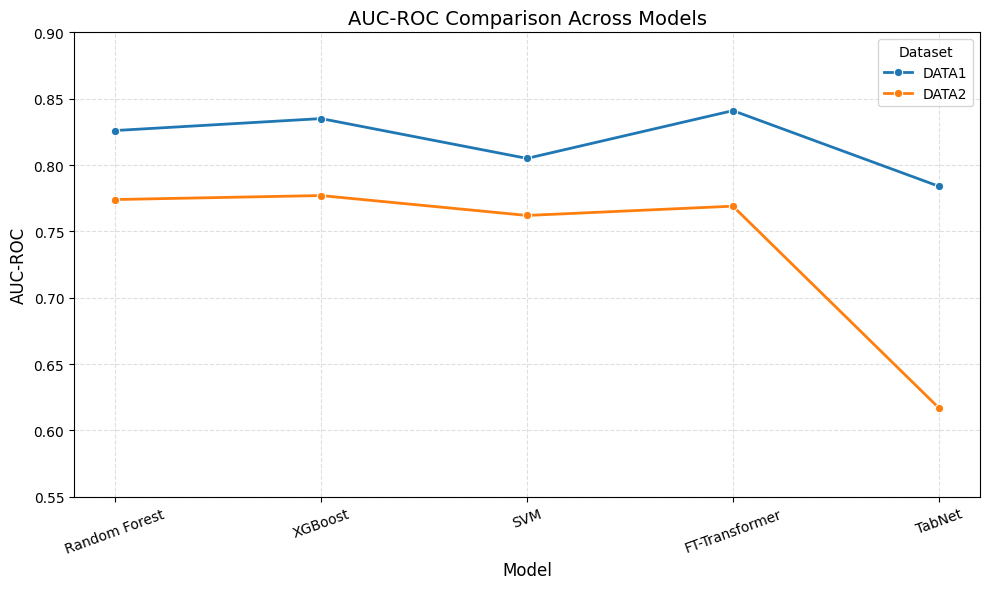

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ["Random Forest", "XGBoost", "SVM", "FT-Transformer", "TabNet"]
auc_data1 = [0.826, 0.835, 0.805, 0.841, 0.784]
auc_data2 = [0.774, 0.777, 0.762, 0.769, 0.617]

# Create DataFrame for Seaborn
df = pd.DataFrame({
    "Model": models * 2,
    "AUC-ROC": auc_data1 + auc_data2,
    "Dataset": ["DATA1"] * 5 + ["DATA2"] * 5
})

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="Model",
    y="AUC-ROC",
    hue="Dataset",
    marker="o",
    linewidth=2
)

plt.title("AUC-ROC Comparison Across Models", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("AUC-ROC", fontsize=12)
plt.xticks(rotation=20)
plt.ylim(0.55, 0.90)
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


2025-11-29 17:16:39,976 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42



=== Dataset 1 (SMOTE+Tomek) | Training FT-Transformer ===


2025-11-29 17:16:40,308 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-11-29 17:16:40,414 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.39411166  0.39411166 -1.22104442 ...  1.34420346  1.91425855
 -0.93601688]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.03399111  0.34509017 -0.34381078 ... -1.03271172  1.37844158
 -0.34381078]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_da

2025-11-29 17:16:40,589 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-11-29 17:16:40,875 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-29 17:16:41,122 - {pytorch_tabular.tabular_model:678} - INFO - Training Started


  | Name             | Type                  | Params | Mode 
-------------------------------------------------------------------
0 | _backbone        | FTTransformerBackbone | 271 K  | train
1 | _embedding_layer | Embedding2dLayer      | 594    | train
2 | _head            | LinearHead            | 66     | train
3 | loss             | CrossEntropyLoss      | 0      | train
-------------------------------------------------------------------
272 K     Trainable params
0         Non-trainable params
272 K     Total params
1.088     Total estimated model params size (MB)
122       Modules in train mode
0         Modules in eval mode
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\dongu\anaconda3\envs\churn_env\Lib

2025-11-29 17:18:08,976 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.65098933  3.62442381  0.39411166 ... -1.03102606  0.01407493
 -0.17594343]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.37716219  0.34509017  1.37844158 ... -0.68826125 -1.37716219
 -1.03271172]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\d

Dataset 1 (SMOTE+Tomek) | FT-Transformer – TEST performance:
  AUC-ROC:   0.841
  AUC-PR:    0.635
  Accuracy:  0.855
  F1-score:  0.529
  Precision: 0.767
  Recall:    0.404


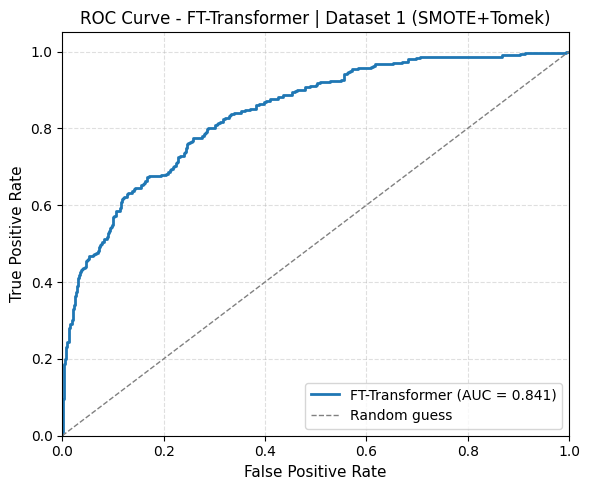

2025-11-29 17:18:10,292 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42



=== Dataset 2 | Training FT-Transformer ===


2025-11-29 17:18:10,353 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-11-29 17:18:10,404 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.5070675  -0.32811287 -0.02985517 ...  0.5070087  -0.56671904
  0.08944792]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16118081 -0.16118081 -0.16118081 ... -0.16118081 -0.16118081
 -0.16118081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_da

2025-11-29 17:18:10,633 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-11-29 17:18:10,705 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-29 17:18:10,765 - {pytorch_tabular.tabular_model:678} - INFO - Training Started


  | Name             | Type                  | Params | Mode 
-------------------------------------------------------------------
0 | _backbone        | FTTransformerBackbone | 271 K  | train
1 | _embedding_layer | Embedding2dLayer      | 1.4 K  | train
2 | _head            | LinearHead            | 66     | train
3 | loss             | CrossEntropyLoss      | 0      | train
-------------------------------------------------------------------
272 K     Trainable params
0         Non-trainable params
272 K     Total params
1.091     Total estimated model params size (MB)
122       Modules in train mode
0         Modules in eval mode
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\dongu\anaconda3\envs\churn_env\Lib

2025-11-29 17:21:12,852 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38770562 -0.5070675  -0.5070675  ... -0.56671904 -0.44741596
 -0.56671904]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16118081 -0.16118081 -0.16118081 ... -0.16118081 -0.16118081
 -0.16118081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\d

Dataset 2 | FT-Transformer – TEST performance:
  AUC-ROC:   0.770
  AUC-PR:    0.729
  Accuracy:  0.722
  F1-score:  0.744
  Precision: 0.690
  Recall:    0.807


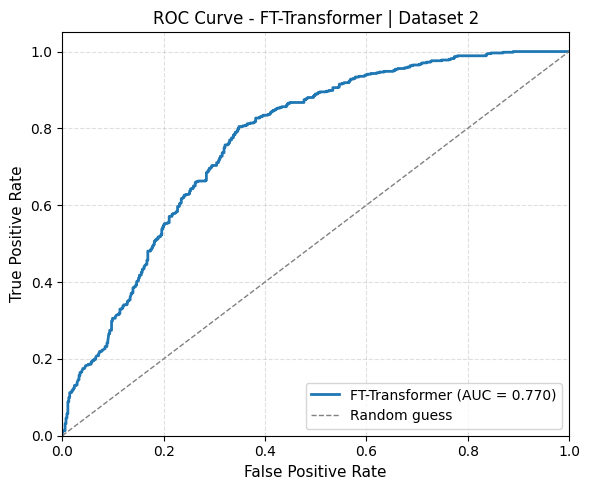

{'Dataset': 'Dataset 1 (SMOTE+Tomek)', 'Model': 'FT-Transformer', 'Test_AUC_ROC': 0.8407445079547592, 'Test_AUC_PR': 0.6345735697817404, 'Test_Accuracy': 0.8553333333333333, 'Test_F1': 0.5292841648590022, 'Test_Precision': 0.7672955974842768, 'Test_Recall': 0.40397350993377484}
{'Dataset': 'Dataset 2', 'Model': 'FT-Transformer', 'Test_AUC_ROC': 0.7695963640664335, 'Test_AUC_PR': 0.7291539583693878, 'Test_Accuracy': 0.7224264705882353, 'Test_F1': 0.7436332767402377, 'Test_Precision': 0.6897637795275591, 'Test_Recall': 0.8066298342541437}


In [35]:
# ==== PyTorch 2.6 + pytorch_tabular compatibility patch ====
import typing
from omegaconf import DictConfig, ListConfig
from omegaconf.base import ContainerMetadata
import torch.serialization as ts

# Allow OmegaConf + typing objects when torch.load is called internally
ts.add_safe_globals([DictConfig, ListConfig, ContainerMetadata, typing.Any])
# ==== END PATCH ====


# =========================
# IMPORTS
# =========================
import matplotlib.pyplot as plt
import numpy as np

import pytorch_tabular
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models import TabNetModelConfig, FTTransformerConfig

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    average_precision_score,
    roc_auc_score,
    roc_curve,
)

# =========================
# BUILD DATAFRAMES
# =========================

# ===== DATASET 1 =====
train_df1 = X1_train.copy()
train_df1["Churn"] = y1_train.values

val_df1 = X1_val.copy()
val_df1["Churn"] = y1_val.values

test_df1 = X1_test.copy()
test_df1["Churn"] = y1_test.values

cont_cols_1 = list(X1_train.columns)  # all numeric; categoricals already encoded
cat_cols_1 = []                       # no raw categoricals left

data_config_1 = DataConfig(
    target=["Churn"],
    continuous_cols=cont_cols_1,
    categorical_cols=cat_cols_1,
)

# ===== DATASET 2 =====
train_df2 = X2_train.copy()
train_df2["Churn"] = y2_train.values

val_df2 = X2_val.copy()
val_df2["Churn"] = y2_val.values

test_df2 = X2_test.copy()
test_df2["Churn"] = y2_test.values

cont_cols_2 = list(X2_train.columns)
cat_cols_2 = []

data_config_2 = DataConfig(
    target=["Churn"],
    continuous_cols=cont_cols_2,
    categorical_cols=cat_cols_2,
)

# =========================
# TRAINER & OPTIMIZER CONFIG
# =========================

trainer_config = TrainerConfig(
    batch_size=256,
    max_epochs=50,
    accelerator="cpu",     # safer
    devices=1,
    progress_bar="none",   # avoid rich progress issues
    load_best=False,       # don't reload from checkpoint
    checkpoints_save_top_k=0,
)

optimizer_config = OptimizerConfig()  # default Adam


# =========================
# MODEL CONFIGS
# =========================

tabnet_config = TabNetModelConfig(
    task="classification",
    learning_rate=1e-3,
)

ftt_config = FTTransformerConfig(
    task="classification",
    learning_rate=1e-3,
)


# =========================
# TRAIN + EVAL + ROC PLOT
# =========================
def train_eval_pttabular(
    model_config,
    data_config,
    train_df,
    val_df,
    test_df,
    dataset_label="Dataset",
    model_label="Model",
):
    # Build model
    tab_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )

    print(f"\n=== {dataset_label} | Training {model_label} ===")
    tab_model.fit(train=train_df, validation=val_df)

    # Predictions on test set
    preds = tab_model.predict(test_df)
    y_true = test_df["Churn"].values

    # Find probability column for positive class
    prob_cols = [c for c in preds.columns if c.endswith("_probability")]

    positive_col = None
    for c in prob_cols:
        if ("_1_probability" in c) or ("_True_probability" in c):
            positive_col = c
            break
    if positive_col is None and len(prob_cols) == 2:
        positive_col = sorted(prob_cols)[1]
    if positive_col is None:
        raise ValueError(
            f"Could not find probability column for positive class. Got columns: {list(preds.columns)}"
        )

    proba_1 = preds[positive_col].to_numpy()

    # Metrics
    y_pred    = (proba_1 >= 0.5).astype(int)
    test_acc  = accuracy_score(y_true, y_pred)
    test_f1   = f1_score(y_true, y_pred)
    test_prec = precision_score(y_true, y_pred)
    test_rec  = recall_score(y_true, y_pred)
    test_aucpr  = average_precision_score(y_true, proba_1)
    test_aucroc = roc_auc_score(y_true, proba_1)

    print(f"{dataset_label} | {model_label} – TEST performance:")
    print(f"  AUC-ROC:   {test_aucroc:.3f}")
    print(f"  AUC-PR:    {test_aucpr:.3f}")
    print(f"  Accuracy:  {test_acc:.3f}")
    print(f"  F1-score:  {test_f1:.3f}")
    print(f"  Precision: {test_prec:.3f}")
    print(f"  Recall:    {test_rec:.3f}")

    # === ROC Curve ===
    fpr, tpr, _ = roc_curve(y_true, proba_1)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, linewidth=2, label=f"{model_label} (AUC = {test_aucroc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey", linewidth=1, label="Random guess")

    plt.title(f"ROC Curve - {model_label} | {dataset_label}", fontsize=12)
    plt.xlabel("False Positive Rate", fontsize=11)
    plt.ylabel("True Positive Rate", fontsize=11)
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.05)
    plt.legend(loc="lower right")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

    return {
        "Dataset":        dataset_label,
        "Model":          model_label,
        "Test_AUC_ROC":   test_aucroc,
        "Test_AUC_PR":    test_aucpr,
        "Test_Accuracy":  test_acc,
        "Test_F1":        test_f1,
        "Test_Precision": test_prec,
        "Test_Recall":    test_rec,
    }


# =========================
# RUN MODELS (FT-TRANSFORMER + optional TabNet)
# =========================

# Dataset 1 – FT-Transformer
results_1_ftt = train_eval_pttabular(
    model_config=ftt_config,
    data_config=data_config_1,
    train_df=train_df1,
    val_df=val_df1,
    test_df=test_df1,
    dataset_label="Dataset 1 (SMOTE+Tomek)",
    model_label="FT-Transformer",
)

# Dataset 2 – FT-Transformer
results_2_ftt = train_eval_pttabular(
    model_config=ftt_config,
    data_config=data_config_2,
    train_df=train_df2,
    val_df=val_df2,
    test_df=test_df2,
    dataset_label="Dataset 2",
    model_label="FT-Transformer",
)

# (Optional) if you also want ROC curves for TabNet, uncomment:

# results_1_tabnet = train_eval_pttabular(
#     model_config=tabnet_config,
#     data_config=data_config_1,
#     train_df=train_df1,
#     val_df=val_df1,
#     test_df=test_df1,
#     dataset_label="Dataset 1 (SMOTE+Tomek)",
#     model_label="TabNet",
# )

# results_2_tabnet = train_eval_pttabular(
#     model_config=tabnet_config,
#     data_config=data_config_2,
#     train_df=train_df2,
#     val_df=val_df2,
#     test_df=test_df2,
#     dataset_label="Dataset 2",
#     model_label="TabNet",
# )

print(results_1_ftt)
print(results_2_ftt)


2025-11-29 17:21:14,980 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42



=== Dataset 1 | Training FT-Transformer ===


2025-11-29 17:21:15,091 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-11-29 17:21:15,140 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.39411166  0.39411166 -1.22104442 ...  1.34420346  1.91425855
 -0.93601688]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.03399111  0.34509017 -0.34381078 ... -1.03271172  1.37844158
 -0.34381078]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_da

2025-11-29 17:21:15,214 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-11-29 17:21:15,290 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-29 17:21:15,504 - {pytorch_tabular.tabular_model:678} - INFO - Training Started


  | Name             | Type                  | Params | Mode 
-------------------------------------------------------------------
0 | _backbone        | FTTransformerBackbone | 271 K  | train
1 | _embedding_layer | Embedding2dLayer      | 594    | train
2 | _head            | LinearHead            | 66     | train
3 | loss             | CrossEntropyLoss      | 0      | train
-------------------------------------------------------------------
272 K     Trainable params
0         Non-trainable params
272 K     Total params
1.088     Total estimated model params size (MB)
122       Modules in train mode
0         Modules in eval mode
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\dongu\anaconda3\envs\churn_env\Lib

2025-11-29 17:22:39,298 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.65098933  3.62442381  0.39411166 ... -1.03102606  0.01407493
 -0.17594343]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.37716219  0.34509017  1.37844158 ... -0.68826125 -1.37716219
 -1.03271172]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\d

Dataset 1 | AUC-ROC: 0.841


2025-11-29 17:22:39,912 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42



=== Dataset 2 | Training FT-Transformer ===


2025-11-29 17:22:39,987 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-11-29 17:22:40,013 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.5070675  -0.32811287 -0.02985517 ...  0.5070087  -0.56671904
  0.08944792]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:386: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16118081 -0.16118081 -0.16118081 ... -0.16118081 -0.16118081
 -0.16118081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.fit_transform(
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_da

2025-11-29 17:22:40,137 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-11-29 17:22:40,213 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-11-29 17:22:40,281 - {pytorch_tabular.tabular_model:678} - INFO - Training Started


  | Name             | Type                  | Params | Mode 
-------------------------------------------------------------------
0 | _backbone        | FTTransformerBackbone | 271 K  | train
1 | _embedding_layer | Embedding2dLayer      | 1.4 K  | train
2 | _head            | LinearHead            | 66     | train
3 | loss             | CrossEntropyLoss      | 0      | train
-------------------------------------------------------------------
272 K     Trainable params
0         Non-trainable params
272 K     Total params
1.091     Total estimated model params size (MB)
122       Modules in train mode
0         Modules in eval mode
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\dongu\anaconda3\envs\churn_env\Lib

2025-11-29 17:26:03,199 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.38770562 -0.5070675  -0.5070675  ... -0.56671904 -0.44741596
 -0.56671904]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\pytorch_tabular\tabular_datamodule.py:390: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.16118081 -0.16118081 -0.16118081 ... -0.16118081 -0.16118081
 -0.16118081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, self.config.continuous_cols] = self.scaler.transform(data.loc[:, self.config.continuous_cols])
c:\Users\d

Dataset 2 | AUC-ROC: 0.770


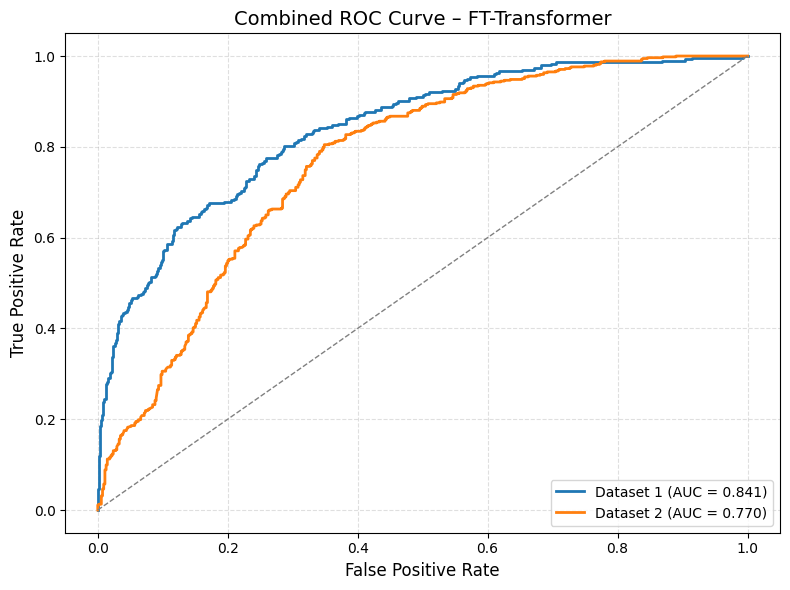

In [36]:
###############################################
# COMBINED ROC CURVE FOR FT-TRANSFORMER
###############################################

# Storage for combined ROC curves
roc_data = {}   # { "Dataset 1": (fpr, tpr, auc), "Dataset 2": (...) }

def train_eval_pttabular_with_roc(
    model_config,
    data_config,
    train_df,
    val_df,
    test_df,
    dataset_label="Dataset",
    model_label="Model",
):
    tab_model = TabularModel(
        data_config=data_config,
        model_config=model_config,
        optimizer_config=optimizer_config,
        trainer_config=trainer_config,
    )

    print(f"\n=== {dataset_label} | Training {model_label} ===")
    tab_model.fit(train=train_df, validation=val_df)

    preds = tab_model.predict(test_df)
    y_true = test_df["Churn"].values

    # Find probability column
    prob_cols = [c for c in preds.columns if c.endswith("_probability")]
    positive_col = None

    for c in prob_cols:
        if ("_1_probability" in c) or ("_True_probability" in c):
            positive_col = c
            break
    if positive_col is None and len(prob_cols) == 2:
        positive_col = sorted(prob_cols)[1]

    proba_1 = preds[positive_col].to_numpy()

    # Metrics
    auc_roc = roc_auc_score(y_true, proba_1)
    fpr, tpr, _ = roc_curve(y_true, proba_1)

    print(f"{dataset_label} | AUC-ROC: {auc_roc:.3f}")

    # Store for combined plot
    roc_data[dataset_label] = (fpr, tpr, auc_roc)

    return auc_roc


###############################################
# RUN FT-TRANSFORMER ON BOTH DATASETS
###############################################

# Dataset 1
train_eval_pttabular_with_roc(
    model_config=ftt_config,
    data_config=data_config_1,
    train_df=train_df1,
    val_df=val_df1,
    test_df=test_df1,
    dataset_label="Dataset 1",
    model_label="FT-Transformer",
)

# Dataset 2
train_eval_pttabular_with_roc(
    model_config=ftt_config,
    data_config=data_config_2,
    train_df=train_df2,
    val_df=val_df2,
    test_df=test_df2,
    dataset_label="Dataset 2",
    model_label="FT-Transformer",
)

###############################################
# COMBINED ROC CURVE PLOT
###############################################

plt.figure(figsize=(8, 6))

for ds_name, (fpr, tpr, auc_v) in roc_data.items():
    plt.plot(fpr, tpr, linewidth=2, label=f"{ds_name} (AUC = {auc_v:.3f})")

# Random baseline
plt.plot([0,1], [0,1], linestyle="--", color="grey", linewidth=1)

plt.title("Combined ROC Curve – FT-Transformer", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


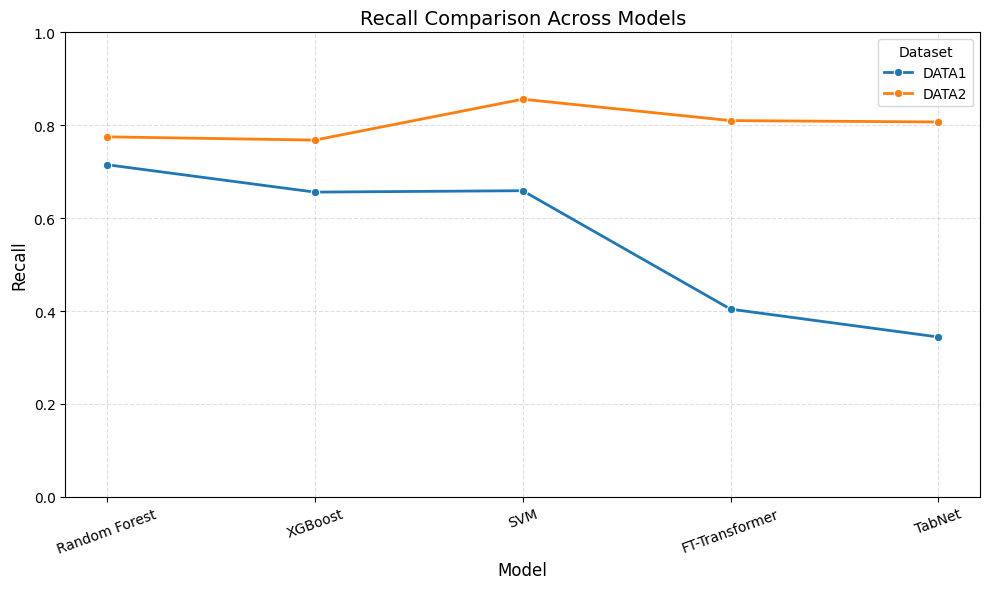

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ["Random Forest", "XGBoost", "SVM", "FT-Transformer", "TabNet"]
recall_data1 = [0.715, 0.656, 0.659, 0.404, 0.344]
recall_data2 = [0.775, 0.768, 0.856, 0.810, 0.807]

# Build DataFrame for Seaborn
df_recall = pd.DataFrame({
    "Model": models * 2,
    "Recall": recall_data1 + recall_data2,
    "Dataset": ["DATA1"] * 5 + ["DATA2"] * 5
})

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_recall,
    x="Model",
    y="Recall",
    hue="Dataset",
    marker="o",
    linewidth=2
)

plt.title("Recall Comparison Across Models", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()



In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Just to sanity-check shapes
print("Train shape:", X2_train.shape)
print("Val shape:  ", X2_val.shape)
print("Test shape: ", X2_test.shape)

# Use the SAME feature set you used when training SVM
X_test_svm = X2_test      # <- important: not X1_test
y_test_svm = y2_test

# Predictions
y_pred_svm = svm_ds1.predict(X_test_svm)

# Confusion matrix (counts)
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM (Dataset 2 / `X2_test`)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()




Train shape: (5073, 21)
Val shape:   (1088, 21)
Test shape:  (1088, 21)


c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 21 features, but StandardScaler is expecting 9 features as input.

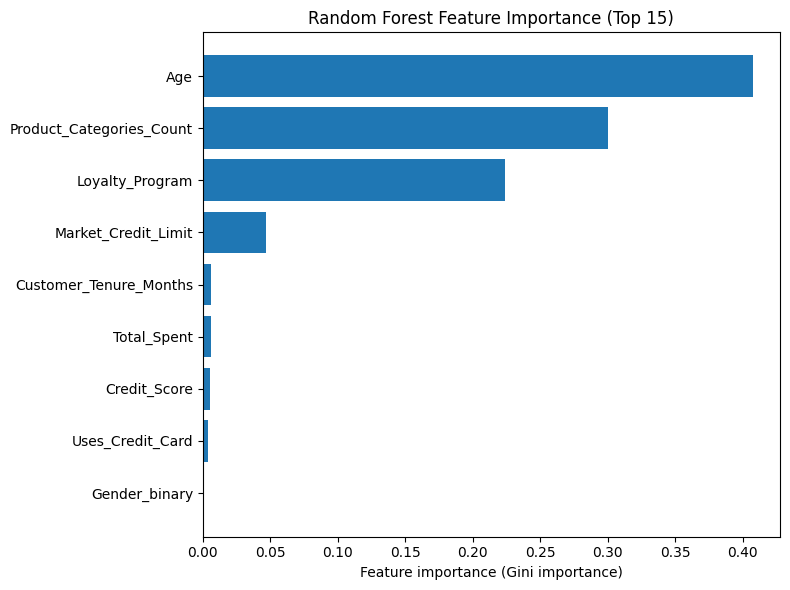

,feature,importance
1,Age,0.407278
4,Product_Categories_Count,0.300208
6,Loyalty_Program,0.223897
3,Market_Credit_Limit,0.047046
2,Customer_Tenure_Months,0.006320
7,Total_Spent,0.005805
0,Credit_Score,0.005277
5,Uses_Credit_Card,0.004168
8,Gender_binary,0.000000


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Choose which RF model and data you want to interpret
rf_model = rf_ds1              # or rf_ds2 depending on your choice
X_train_rf = X1_train_smote_tomek  # or X2_train

feature_names = X_train_rf.columns

# Extract feature importances
importances = rf_model.feature_importances_

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# Show top 15 features in a bar plot
top_n = 15
fi_top = fi_df.head(top_n).iloc[::-1]  # reverse for nicer plotting

plt.figure(figsize=(8, 6))
plt.barh(fi_top["feature"], fi_top["importance"])
plt.xlabel("Feature importance (Gini importance)")
plt.title("Random Forest Feature Importance (Top 15)")
plt.tight_layout()
plt.show()

fi_df.head(20)



In [ ]:
# ====================== SHAP ANALYSIS FOR SVM (Dataset 1) ======================

# This code assumes you already ran:
# svm_ds1, svm_study_ds1, svm_res_ds1 = tune_and_evaluate_model(
#     "SVM",
#     X1_train_smote_tomek, y1_train_smote_tomek,
#     X1_val, y1_val,
#     X1_test, y1_test,
#     n_trials=10,
#     dataset_label="Dataset 1 (SMOTE+Tomek)"
# )

import shap
import numpy as np
import matplotlib.pyplot as plt

shap.initjs()

# 1. Extract fitted SVM model from svm_ds1 (handle different possible structures)
if isinstance(svm_ds1, dict):
    best_svm = (
        svm_ds1.get("best_model")
        or svm_ds1.get("model")
        or svm_ds1.get("estimator")
    )
else:
    best_svm = svm_ds1

if best_svm is None:
    raise ValueError("Could not find fitted SVM model in svm_ds1. Check the keys/structure.")

# 2. Background data for SHAP (subset of resampled training data)
try:
    # If X1_train_smote_tomek is a DataFrame, this works nicely
    X_background = shap.sample(X1_train_smote_tomek, 200, random_state=42)
except Exception:
    # Fallback for numpy arrays
    X_train_arr = np.asarray(X1_train_smote_tomek)
    rng = np.random.default_rng(42)
    n_bg = min(200, len(X_train_arr))
    idx = rng.choice(len(X_train_arr), size=n_bg, replace=False)
    X_background = X_train_arr[idx]

# 3. Define prediction function for SHAP (prefer probabilities if available)
if hasattr(best_svm, "predict_proba"):
    predict_func = best_svm.predict_proba
    use_proba = True
else:
    predict_func = best_svm.decision_function
    use_proba = False

explainer = shap.KernelExplainer(predict_func, X_background)

# 4. Data to explain (here: full test set; you can subsample if too slow)
X_explain = X1_test  # or X1_val, or X1_test.sample(500, random_state=42)

feature_names = getattr(X_explain, "columns", None)

# 5. Compute SHAP values (nsamples = trade-off speed vs accuracy)
shap_values = explainer.shap_values(X_explain, nsamples=200)

# 6. Extract SHAP values for churn class (1) in binary case with proba
if use_proba and isinstance(shap_values, list) and len(shap_values) >= 2:
    shap_values_churn = shap_values[1]
else:
    shap_values_churn = shap_values

# 7. GLOBAL IMPORTANCE PLOTS
# 7a. Beeswarm plot
plt.figure()
shap.summary_plot(
    shap_values_churn,
    X_explain,
    feature_names=feature_names,
    show=True
)

# 7b. Bar plot of mean |SHAP| (global feature ranking)
plt.figure()
shap.summary_plot(
    shap_values_churn,
    X_explain,
    feature_names=feature_names,
    plot_type="bar",
    show=True
)

# 8. LOCAL EXPLANATION FOR A SINGLE INSTANCE (first test point)
if hasattr(X_explain, "iloc"):
    x_i = X_explain.iloc[[0]]  # keep as DataFrame
else:
    x_i = X_explain[0:1]

shap_values_i = explainer.shap_values(x_i)

if use_proba and isinstance(shap_values_i, list) and len(shap_values_i) >= 2:
    shap_values_i_churn = shap_values_i[1][0]
    base_val = explainer.expected_value[1]
else:
    shap_values_i_arr = np.array(shap_values_i)
    shap_values_i_churn = shap_values_i_arr[0]
    if isinstance(explainer.expected_value, (list, np.ndarray)):
        base_val = explainer.expected_value[0]
    else:
        base_val = explainer.expected_value

# Build Explanation object for waterfall plot
exp = shap.Explanation(
    values=shap_values_i_churn,
    base_values=base_val,
    data=np.array(x_i)[0],
    feature_names=feature_names
)

plt.figure()
try:
    # Newer SHAP versions
    shap.plots.waterfall(exp, show=True)
except Exception:
    # Legacy fallback
    shap.plots._waterfall.waterfall_legacy(exp)


c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
C:\Users\dongu\AppData\Local\Temp\ipykernel_3996\3701987865.py:42: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


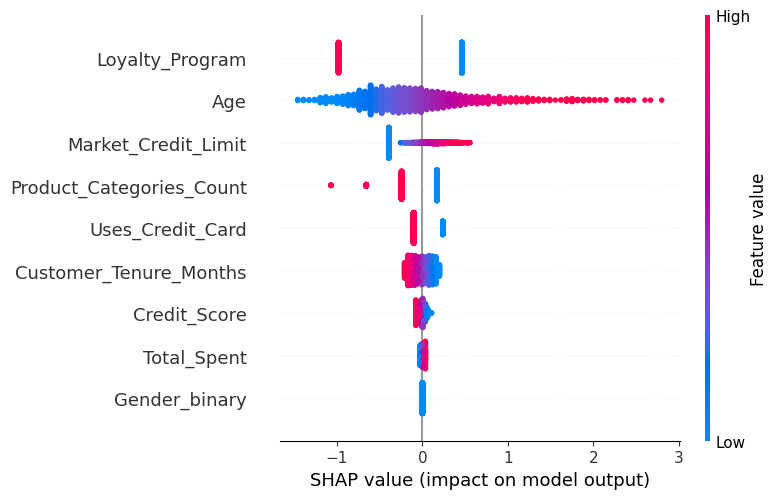

In [ ]:
# ================= SHAP BEESWARM FOR LINEAR SVM (DATASET 1) =================
# Uses: X1_train_smote_tomek, y1_train_smote_tomek, X1_test, y1_test

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

shap.initjs()

# 1. Scale features (linear SVM needs scaling)
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train_smote_tomek)
X1_test_scaled  = scaler.transform(X1_test)

# 2. Train a simple linear SVM with probabilities
svc_linear = SVC(kernel='linear', probability=True, random_state=42)
svc_linear.fit(X1_train_scaled, y1_train_smote_tomek)

# 3. SHAP LinearExplainer
explainer = shap.LinearExplainer(
    svc_linear,
    X1_train_scaled,
    feature_perturbation="interventional"
)

# 4. Compute SHAP values for the test set
shap_values = explainer.shap_values(X1_test_scaled)

# Handle both possible shapes (list vs array)
if isinstance(shap_values, list):
    # Binary classification → pick class 1 (positive / churn)
    shap_values_to_plot = shap_values[1] if len(shap_values) > 1 else shap_values[0]
else:
    shap_values_to_plot = shap_values  # shape: (n_samples, n_features)

# 5. Beeswarm plot (global feature importance)
feature_names = getattr(X1_test, "columns", None)

plt.figure()
shap.summary_plot(
    shap_values_to_plot,
    X1_test,               # use original (unscaled) test set for nicer axis labels
    feature_names=feature_names,
    show=True
)


c:\Users\dongu\anaconda3\envs\churn_env\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
C:\Users\dongu\AppData\Local\Temp\ipykernel_3996\4289183190.py:41: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


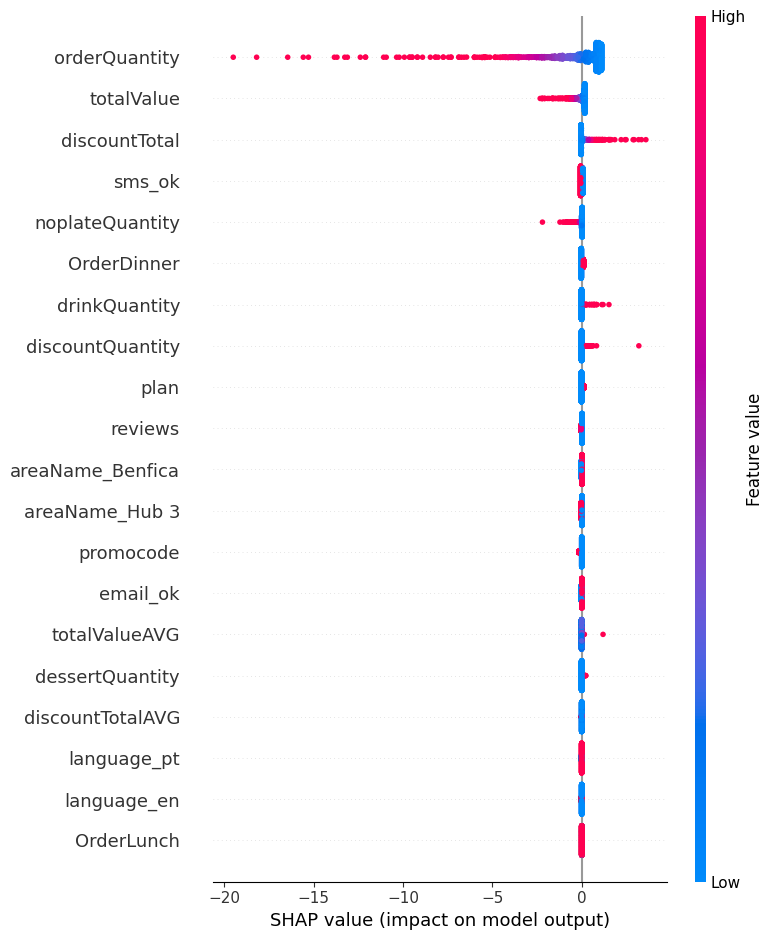

In [80]:
# ================= SHAP BEESWARM FOR LINEAR SVM (DATASET 2) =================
# Uses: X2_train, y2_train, X2_test, y2_test

import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

shap.initjs()

# 1. Scale features (linear SVM needs scaling)
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled  = scaler2.transform(X2_test)

# 2. Train a simple linear SVM with probabilities ON THE SCALED DATA
svc_linear2 = SVC(kernel='linear', probability=True, random_state=42)
svc_linear2.fit(X2_train_scaled, y2_train)

# 3. SHAP LinearExplainer – use the SAME training data (scaled)
explainer2 = shap.LinearExplainer(
    svc_linear2,
    X2_train_scaled,
    feature_perturbation="interventional"
)

# 4. Compute SHAP values for the (scaled) test set
shap_values2 = explainer2.shap_values(X2_test_scaled)

# Binary classification → pick class 1 if SHAP returns a list
if isinstance(shap_values2, list):
    shap_values2_to_plot = shap_values2[1] if len(shap_values2) > 1 else shap_values2[0]
else:
    shap_values2_to_plot = shap_values2

# 5. Beeswarm plot (global feature importance)
feature_names2 = getattr(X2_test, "columns", None)

plt.figure()
shap.summary_plot(
    shap_values2_to_plot,
    X2_test,                 # original (unscaled) for nicer labels
    feature_names=feature_names2,
    show=True
)


C:\Users\dongu\AppData\Local\Temp\ipykernel_3996\2521856659.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


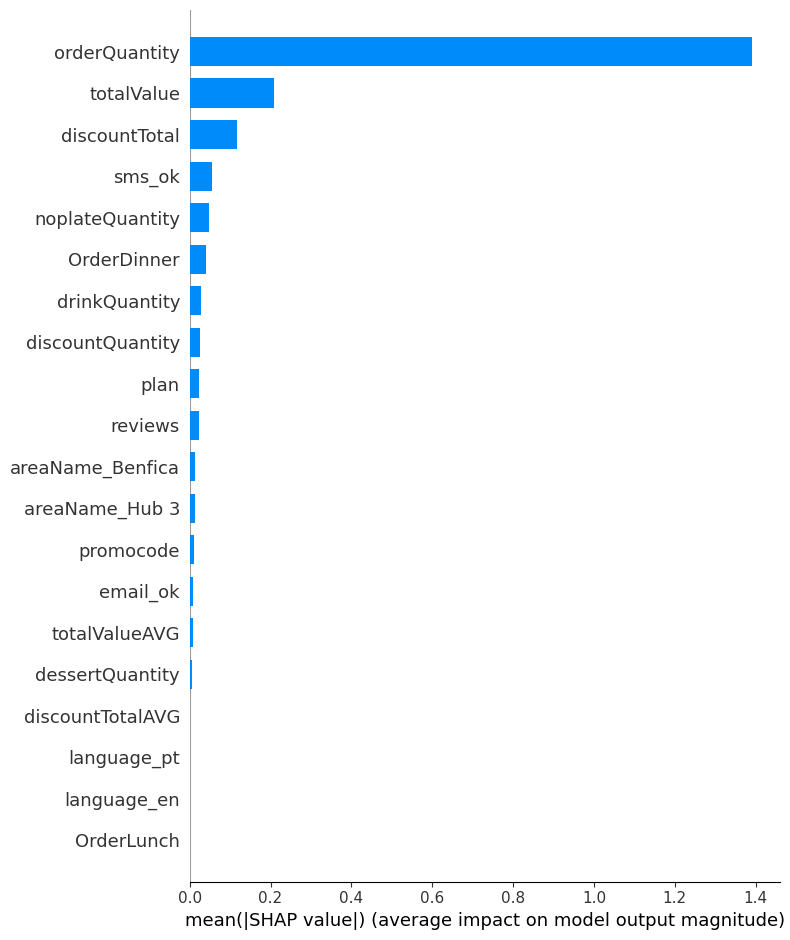

In [81]:
shap.summary_plot(
    shap_values2_to_plot,
    X2_test,
    plot_type="bar",
    feature_names=feature_names2
)


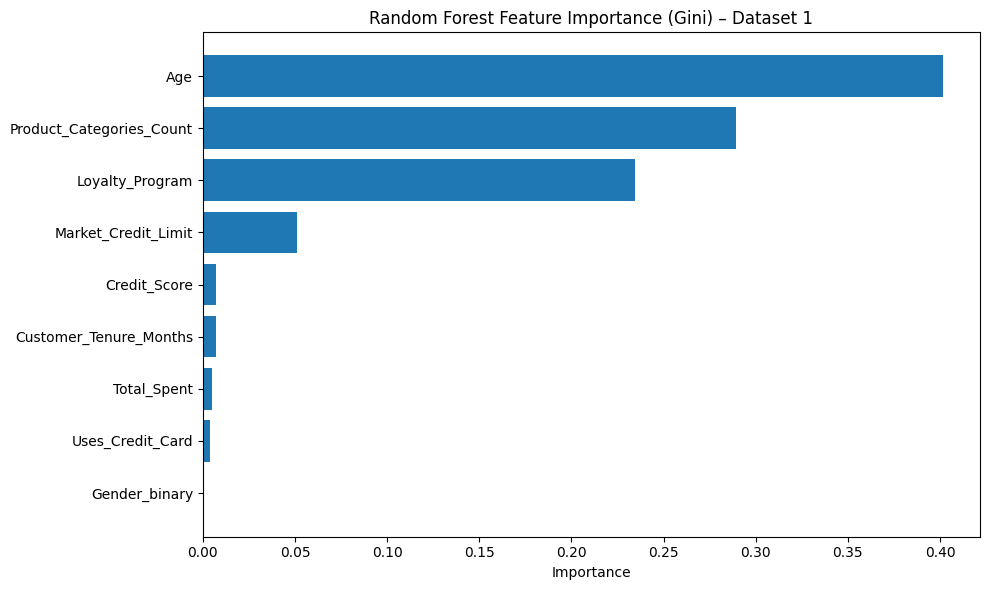

In [85]:
# ====================== RF FEATURE IMPORTANCE — DATASET 1 ======================
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 1. Train Random Forest with best params
rf1 = RandomForestClassifier(
    n_estimators=306,
    max_depth=5,
    min_samples_split=5,
    max_features=None,
    random_state=42,
    n_jobs=-1
)

rf1.fit(X1_train_smote_tomek, y1_train_smote_tomek)

# 2. Gini Importance (horizontal)
importances1 = rf1.feature_importances_
feature_names1 = X1_train_smote_tomek.columns
indices1 = np.argsort(importances1)

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance (Gini) – Dataset 1")
plt.barh(feature_names1[indices1], importances1[indices1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



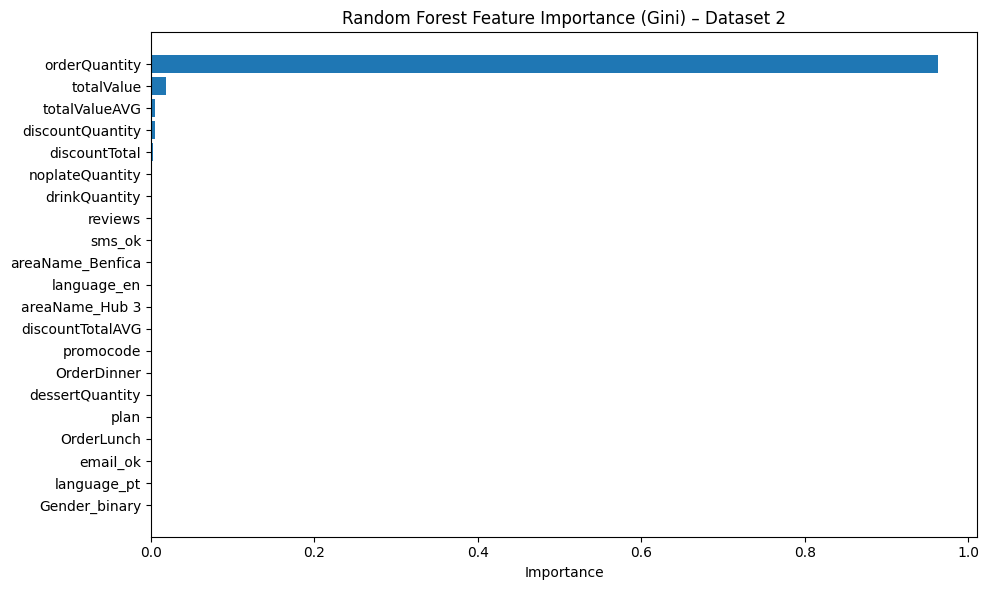

In [86]:
# ====================== RF FEATURE IMPORTANCE — DATASET 2 ======================
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 1. Train Random Forest with best params
rf2 = RandomForestClassifier(
    n_estimators=113,
    max_depth=3,
    min_samples_split=7,
    max_features=None,
    random_state=42,
    n_jobs=-1
)

rf2.fit(X2_train, y2_train)

# 2. Gini Importance (horizontal)
importances2 = rf2.feature_importances_
feature_names2 = X2_train.columns
indices2 = np.argsort(importances2)

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance (Gini) – Dataset 2")
plt.barh(feature_names2[indices2], importances2[indices2])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

